In [11]:
import math
import cvxpy
import numpy as np
import cubic_spline_planner
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.stats import multivariate_normal as mvn

import importlib
import MPC
importlib.reload(MPC)
from MPC import MPC, Vehicle, Simulation, plot_car
from tqdm.autonotebook import tqdm

from utils import *

In [3]:
trajectory = Trajectory()
states, measurements = trajectory.get_data()

MPC: 0it [00:00, ?it/s]

Goal


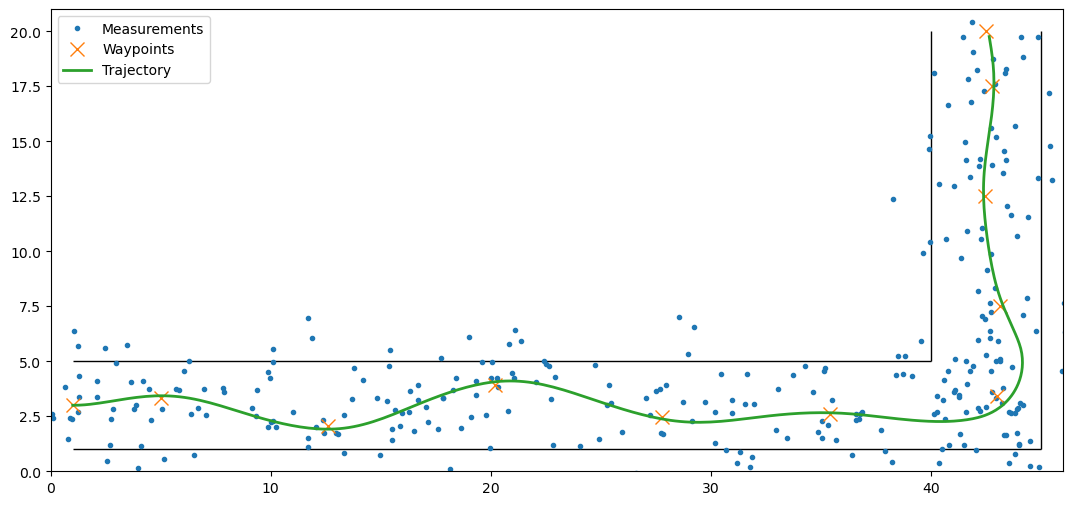

In [13]:
trajectory.plot(states, measurements)

In [8]:
system = CarTrajectoryLinear()

f = lambda x: system.A @ x
h = trajectory.h
R = trajectory.R
Q = system.Q

extended_kalman_filter = UKF(f, h, Q, R, dim_m = 4, dim_y = 2)
state_estimates, cov_estimates = extended_kalman_filter.filter(measurements)
state_estimates_smoothed, cov_estimates_smoothed = extended_kalman_filter.smoother(state_estimates, cov_estimates)

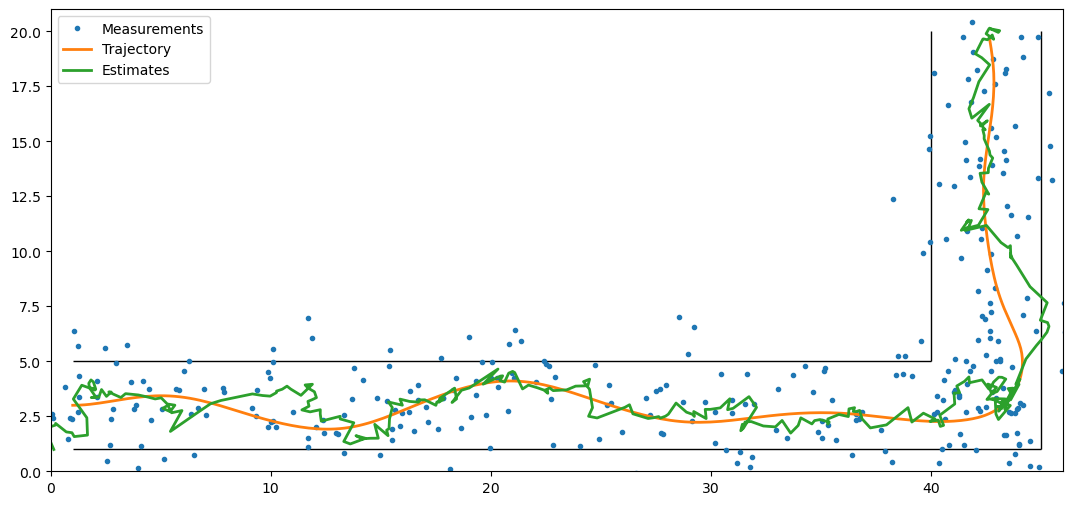

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(measurements[:, 0], measurements[:, 1], 'o', label='Measurements', markersize=3)
ax.plot(states[:, 0], states[:, 1], label='Trajectory', linewidth=2)
ax.plot(state_estimates[:, 0], state_estimates[:, 1], label='Estimates', linewidth=2)
#ax.plot(state_estimates_smoothed[:, 0], state_estimates_smoothed[:, 1], label='Estimates', linewidth=2)

ax.hlines(1, 1, 45, color='k', linestyle='solid', linewidth=1)
ax.hlines(5, 1, 40, color='k', linestyle='solid', linewidth=1)
ax.vlines(45, 1, 20, color='k', linestyle='solid', linewidth=1)
ax.vlines(40, 5, 20, color='k', linestyle='solid', linewidth=1)

ax.set_xlim(0, 46)
ax.set_ylim(0, 21)
ax.set_aspect('equal')

ax.legend()

plt.show()

In [141]:
trajectory.animate(filename='animation')

  0%|          | 0/314 [00:00<?, ?it/s]

MovieWriter Pillow unavailable; using Pillow instead.
